In [1]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
digits.data.shape
#print(digits.DESCR)

(1797, 64)

<Figure size 432x288 with 0 Axes>

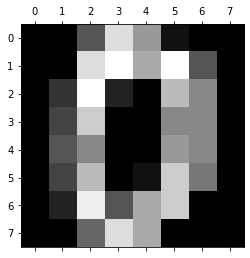

In [2]:
# Show one data
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 


In [3]:
print("digit.image0 matrix values : ")
print(digits.images[0])

digit.image0 matrix values : 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


n_digits =  [0 1 2 3 4 5 6 7 8 9]


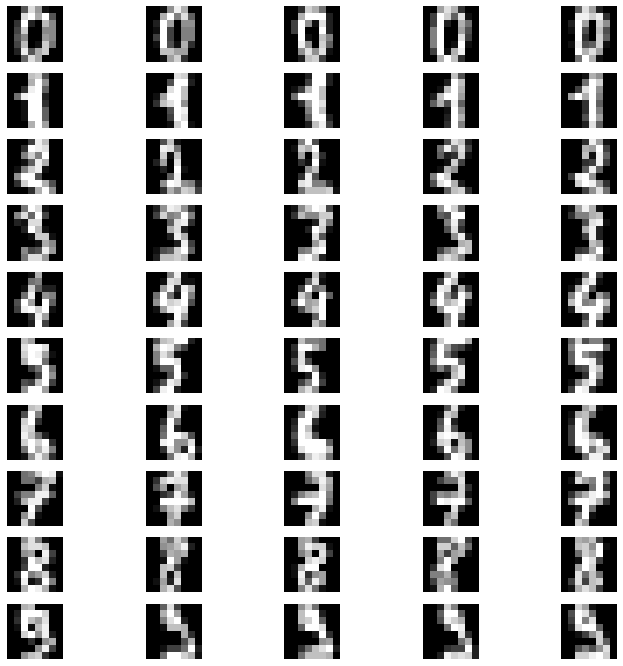

In [4]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 5  #10
#dim = int(np.sqrt(X.shape[1]))   # nombre de pixel par ligne : image 8x8

print("n_digits = ", n_digits)

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):    # d=index de x : de 0 à 9
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])   # when Y = d show image (d in enumerate n_digits {0..9}) 
        axs[i,j].axis('off')
        

## 1) Get and understand your data


In [5]:
#print(digits.DESCR)

In [6]:
#what is the type of the data ?
type(digits.data)

numpy.ndarray

In [7]:
# How many pixel has one data instance ?
# 8x8 = 64 pixels
digits.images[0].shape


(8, 8)

In [9]:
# What is the type of data of one pixel ? what does it represents ?
onedigit = digits.images[0]
print("array of all pixels of one digit = ")
print(onedigit)
print("taking a pixel example from : ",onedigit[0,3])
print("type of data of one pixel : ", type(onedigit[0,3]))

array of all pixels of one digit = 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
taking a pixel example from :  13.0
type of data of one pixel :  <class 'numpy.float64'>


In [ ]:
print("mes images = ",digits.images)
print("mes targets = ",digits.target)

## 2) Prepare your ML algorithm

### Veille sur les algorithmes de classification : 

<br><b>How to evaluate classification algorithms ?</b><br>

Evaluating a ML algorithme is an essential part of any project.

Your model may give you satisfying results when evaluated using a metric say "accuracy_score" but may give poor results when evaluated against other metrics such as "logarithmic_loss" or any other such metric. 

Most of the times we use classification accuracy to measure the performance of our model, however it is not enough to truly judge our model. 

different types of evaluation metrics available:

Classification Accuracy
Logarithmic Loss
Confusion Matrix
Area under Curve
F1 Score
Mean Absolute Error
Mean Squared Error

* Classification Accuracy : It is the ratio of number of correct predictions to the total number of input samples.

  <img src="https://miro.medium.com/max/373/1*yRa2inzTnyASJOre93ep3g.gif" /><br>


* Logarithmic Loss : penalising the false classifications :
 When working with Log Loss, the classifier must assign probability to each class for all the samples. Suppose, there are N samples belonging to M classes, then the Log Loss is calculated as below :
 
  <img src="https://miro.medium.com/max/344/1*dtpzlB_dNrmxDq7fGnJ4cg.gif" /><br>
 Log Loss has no upper bound and it exists on the range [0, ∞). Log Loss nearer to 0 indicates higher accuracy, whereas if the Log Loss is away from 0 then it indicates lower accuracy.
 
 
* Confusion Matrix : describes the complete performance of the model. There are 4 important terms(True Positives,True Negatives,False Positives,False Negatives)
 
  <img src="https://miro.medium.com/max/373/1*xvJylefImAAukT7dx7lZ3g.png" /><br>


* Area Under Curve : AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher  than a randomly chosen negative example. It is used for binary classification problem. here we usally talk about (True Positive Rate (Sensitivity) =  TP/ (FN+TP) , True Negative Rate (Specificity) = TN / (FP+TN) and False Positive Rate = FP / (FP+TN) ) 


* F1 Score : F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as : F1 = 2/(1/precison + 1/recall).

* Mean Absolute Error : Mean Absolute Error is the average of the difference between the Original Values and the Predicted Values.
   
* Mean Squared Error : Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and the predicted values
 

<br><b>Question : Write the equation of the precision and recall score and explicit what each terms represents.</b><br>

 <img src="https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png" /><br>

<br><b>explain the purpose of the training set ?</b><br>

Training Dataset: The sample of data used to fit the model.
The actual dataset that we use to train the model. The model sees and learns from this data.

<br><b>explain the prpose of the testing set ?</b><br>

The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained(using the train and validation sets). The test set is generally what is used to evaluate competing models (For example on many Kaggle competitions, the validation set is released initially along with the training set and the actual test set is only released when the competition is about to close, and it is the result of the the model on the Test set that decides the winner). Many a times the validation set is used as the test set, but it is not good practice. The test set is generally well curated. It contains carefully sampled data that spans the various classes that the model would face, when used in the real world.


 <img src="https://miro.medium.com/max/700/1*Nv2NNALuokZEcV6hYEHdGA.png"><br>

## MODEL : 

In [10]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [11]:

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1)) # coverting the array of matrixs (3D) to array of arrays (2D)
Y = digits.target


## Single class classification 

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        19

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180




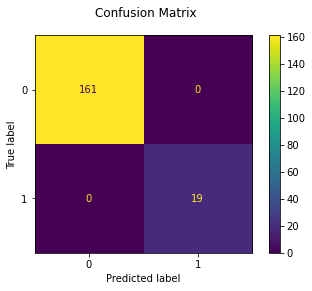

In [12]:

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, shuffle=False)

#Prediction for the hand written digit 7 
y_train[y_train !=7] = 0 
y_test[y_test !=7] = 0 
y_train[y_train ==7] = 1 
y_test[y_test ==7] = 1


# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first part of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second part :
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [13]:
X_test
y_test


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [15]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

# We learn the digits on the first part of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second part :
predicted = classifier.predict(X_test)

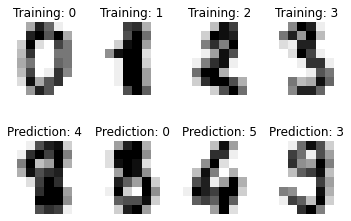

In [16]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

In [17]:
print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




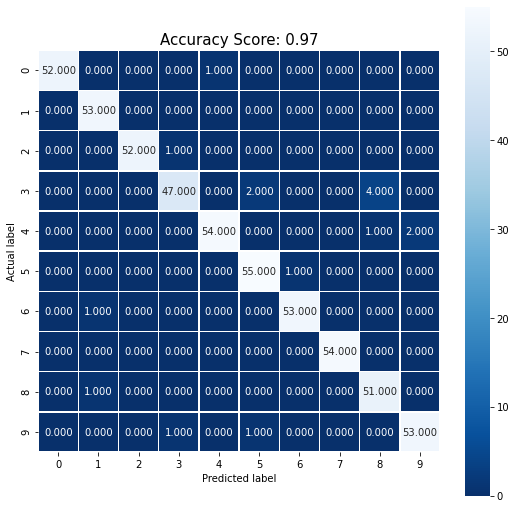

In [18]:
import seaborn as sns

predictions = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(score) 
plt.title(all_sample_title, size = 15);

## Other models :  

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [29]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])


In [30]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
eclf.fit(X_train, y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

In [31]:
print("DecisionTreeClassifier score: {:.3f}".format(clf1.score(X_train, y_train)))
print("KNeighborsClassifier score: {:.3f}".format(clf2.score(X_test, y_test)))
print("SVC Training  score: {:.3f}".format(clf3.score(X_train, y_train)))
print("VotingClassifier score: {:.3f}".format(eclf.score(X_test, y_test)))

DecisionTreeClassifier score: 0.589
KNeighborsClassifier score: 0.961
SVC Training  score: 1.000
VotingClassifier score: 0.870
